In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# load processed dataset
data = np.load("../data/processed_data.npz")
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]

In [3]:
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -1.78226765,
        -0.32901188,  1.15204324],
       [ 0.        ,  0.        ,  0.        , ...,  0.04559702,
        -0.0205555 ,  1.31122015],
       [ 0.        ,  0.        ,  0.        , ..., -0.15297687,
         1.35569041, -0.8118748 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.35497111,
        -1.87093051, -0.8118748 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.26932566,
         0.20849726,  1.22841048],
       [ 0.        ,  0.        ,  0.        , ..., -0.8275492 ,
        -0.62155968,  1.20006493]], shape=(3506, 54))

In [4]:
poly_fe = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_fe.fit_transform(X_train)
X_test_poly = poly_fe.transform(X_test)
print(X_train_poly, X_train_poly.shape, X_train_poly.dtype)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.08248814e-01
  -3.79035907e-01  1.32720363e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.22528529e-04
  -2.69527842e-02  1.71929829e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.83789649e+00
  -1.10065088e+00  6.59140691e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.50038096e+00
   1.51896133e+00  6.59140691e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  4.34711086e-02
   2.56120224e-01  1.50899232e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.86336436e-01
  -7.45911975e-01  1.44015584e+00]] (3506, 1539) float64


In [5]:
# train the model
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
#print the coefficients
print(poly_regressor.coef_)


[-0.01706047  0.15756613  0.38829284 ...  0.02118153  0.01867018
 -0.26790644]


In [7]:
# predicting the test set
y_pred = poly_regressor.predict(X_test_poly)
print(np.expm1(y_pred).round(2), y_pred.shape, y_pred.dtype)

[ 434979.7   699784.08  568088.07  253366.05  883285.54  402168.39
  223225.36  186719.14  343138.89  338588.51  196172.42  443585.17
  630380.66  332210.72  487352.12  727778.74  384165.43  666591.87
  307500.47  209162.66 1522975.17  209880.42  426671.11  514735.28
  414786.84  545722.93  184409.82  652403.75  297707.24  436163.88
 1042835.43  566754.86  419955.44  361963.09  597019.89  546234.92
  404136.25  294494.13  243491.75  318554.65  334225.88  698383.48
  498839.15  632834.57  605727.79  430524.26  604065.82 1326434.97
 1065337.3   331939.97  653954.19  524834.07  489533.45  558054.03
  653859.23  416907.22  759482.94  427034.48  419499.96  363522.35
  530202.24  130262.21  879814.27  548437.51  556554.15  499148.27
  368484.62 1072435.46  335293.68  279707.67  563842.21  648255.8
  461747.44  313776.14 1991778.67  471198.26  309349.48  504046.97
 2358175.93  350624.95  458302.61  288136.81  429968.7   548062.97
  127536.01  759599.95  233057.53  365168.44  456233.2   326900

In [8]:
# compare predicted values vs Actual values
print(np.concatenate((y_pred.reshape(len(y_pred),1).round(2), y_test.reshape(len(y_test),1).round(2)),1))

[[12.98 13.14]
 [13.46 13.85]
 [13.25 13.34]
 ...
 [12.7  12.57]
 [12.36 12.54]
 [13.79 13.72]]


In [9]:
# predicting for one sample
one_sample = X_test_poly[0]
y_hat_1 =poly_regressor.predict([one_sample])[0]
print(np.expm1(y_hat_1).round(2))

434979.7


In [10]:
# measure model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 0.206
Mean Squared Error (MSE): 0.103
Root Mean Squared Error (RMSE): 0.321
R² Score: 0.641


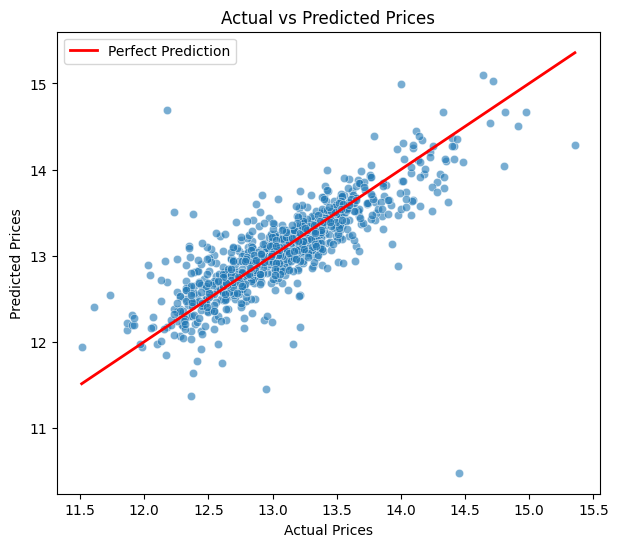

In [11]:
# visualize model performance
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


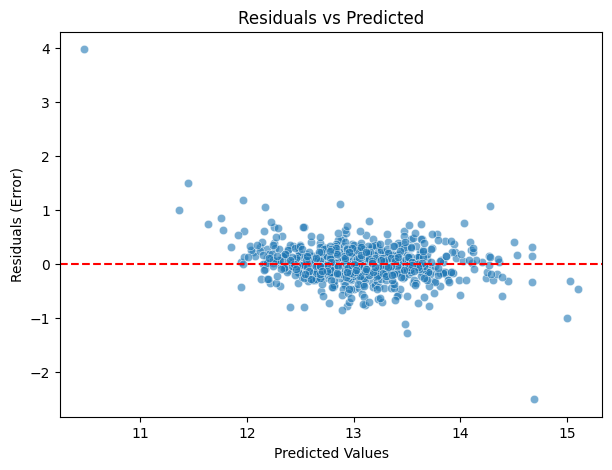

In [12]:
# residual plot
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Error)")
plt.title("Residuals vs Predicted")
plt.show()

In [13]:
poly_fe.get_feature_names_out()

array(['x0', 'x1', 'x2', ..., 'x52^2', 'x52 x53', 'x53^2'],
      shape=(1539,), dtype=object)

In [14]:
feature_names = [f'dummy_{i}' for i in range(43)] + [
    'bedrooms','bathrooms','floors','waterfront','view','condition',
    'was_renovated','age','sqft_lot','sqft_living','sqft_basement'
]
# get polynomial feature names after fitting
poly_feature_names = poly_fe.get_feature_names_out(feature_names)
poly_feature_names

array(['dummy_0', 'dummy_1', 'dummy_2', ..., 'sqft_living^2',
       'sqft_living sqft_basement', 'sqft_basement^2'],
      shape=(1539,), dtype=object)

In [15]:
# check feature importance (coefficients)
coeffs_full = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': poly_regressor.coef_.flatten()
})

main_features = [
    'bedrooms','bathrooms','floors','waterfront','view','condition',
    'was_renovated','age','sqft_lot','sqft_living','sqft_basement'
]

coeffs = coeffs_full[coeffs_full['Feature'].isin(main_features)].copy()
coeffs['Intercept'] = poly_regressor.intercept_

coeffs = coeffs.sort_values(by='Coefficient', ascending=False).reset_index(drop=True)
coeffs

,Feature,Coefficient,Intercept
0,waterfront,0.565933,12.783897
1,sqft_living,0.388280,12.783897
2,view,0.156415,12.783897
3,sqft_basement,0.116869,12.783897
4,floors,0.084299,12.783897
5,sqft_lot,0.067896,12.783897
6,bedrooms,0.061938,12.783897
7,condition,0.043719,12.783897
8,age,0.005189,12.783897
9,was_renovated,-0.013752,12.783897
